## Attempting to cluster users to add feature in ML model

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
Reviews = pd.read_csv("HOPEFUL.csv") # our ironic name of our training/testing dataset

In [19]:
Reviews.head()

Unnamed: 0  Unnamed: 0.1             business_id        date  stars  \
0           0             0  0W4lkclzZThpx3V65bVgig  2016-05-28      5   
1           1             1  AEx2SYEUJmTxVVB18LlCwA  2016-05-28      5   
2           2             2  VR6GpWIda3SfvPC-lg9H3w  2016-05-28      5   
3           3             3  CKC0-MOWMqoeWf6s-szl8g  2016-05-28      5   
4           4             4  ACFtxLv8pGrrxMm6EgjreA  2016-05-28      4   

                  user_id name_of_month day_of_week  user_average_stars  \
0  bv2nCi5Qv5vroFiqKGopiw           May    Saturday                4.67   
1  bv2nCi5Qv5vroFiqKGopiw           May    Saturday                4.67   
2  bv2nCi5Qv5vroFiqKGopiw           May    Saturday                4.67   
3  bv2nCi5Qv5vroFiqKGopiw           May    Saturday                4.67   
4  bv2nCi5Qv5vroFiqKGopiw           May    Saturday                4.67   

   user_cool        ...         business_catgrylv1  business_lat  \
0          0        ...         Breakfast & Brunch     45.516373   
1          0        ...                       Food     45.523333   
2          0        ...         Breakfast & Brunch     45.472902   
3          0        ...         Breakfast & Brunch     45.522144   
4          0        ...         Breakfast & Brunch     45.502510   

   business_long  business_zip lv1Cat_Av  lv2Cat_Av  zipCodeBusiness_Av  \
0     -73.577537       H2W 1X9  3.739232   3.731733            3.980257   
1     -73.594859       H2T 2M1  3.719693   3.731733            4.031579   
2     -73.588321       H4C 1S7  3.739232   3.731733            4.280899   
3     -73.607076       H2V 1V1  3.739232   3.731733            3.943038   
4     -73.570119       H3B 1B9  3.739232   3.731733            3.119792   

  zipCodeUser_Av zipCodeUser_WeightedAv  zipCodeUserCount  
0       3.779459               3.720424              2162  
1       3.875368               3.711489                95  
2       3.843488               3.927304                86  
3       3.837975               3.851323                79  
4       3.609978               3.655213               462  

[5 rows x 28 columns]

In [20]:
Reviews1 = Reviews[['user_average_stars','user_num_reviews','user_num_friends']]
Reviews1 = Reviews1.drop_duplicates()
Reviews2 = (Reviews1 - Reviews1.mean()) / (Reviews1.max() - Reviews1.min())

In [28]:
f1 = Reviews2['user_average_stars'].values
f2 = Reviews2['user_num_reviews'].values
f3 = Reviews2['user_num_friends'].values
X = np.array(list(zip(f1, f2,f3)))

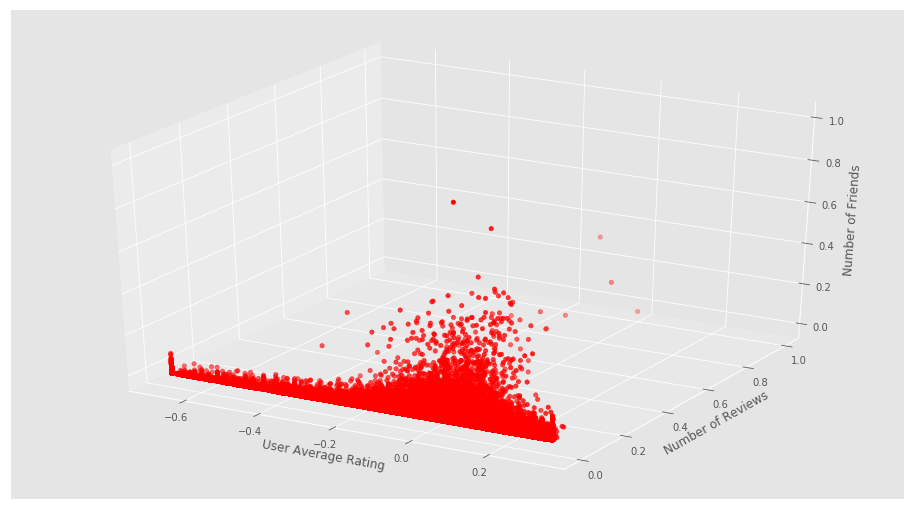

In [53]:
# initial visualization of user average rating, number of reviews, and number of friends 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1, f2, f3, c='r', marker='o')
ax.set_xlabel('User Average Rating')
ax.set_ylabel('Number of Reviews')
ax.set_zlabel('Number of Friends')
plt.show()

## Now trying 8, 16, and 32 clusters

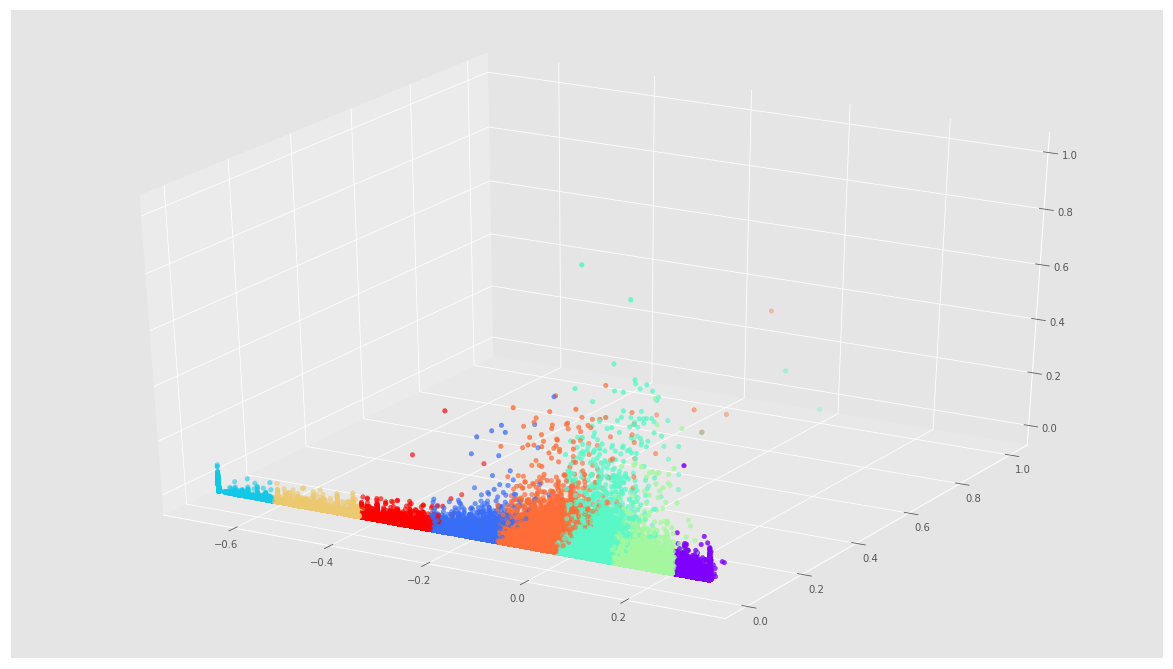

In [40]:
# Number of clusters
kmeans = KMeans(n_clusters=8)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],X[:, 2],c=kmeans.labels_, cmap='rainbow')
# Get rid of colored axes planes

fig.savefig("TechReportFigures/UserClusters/Cluster8.png")


#ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)


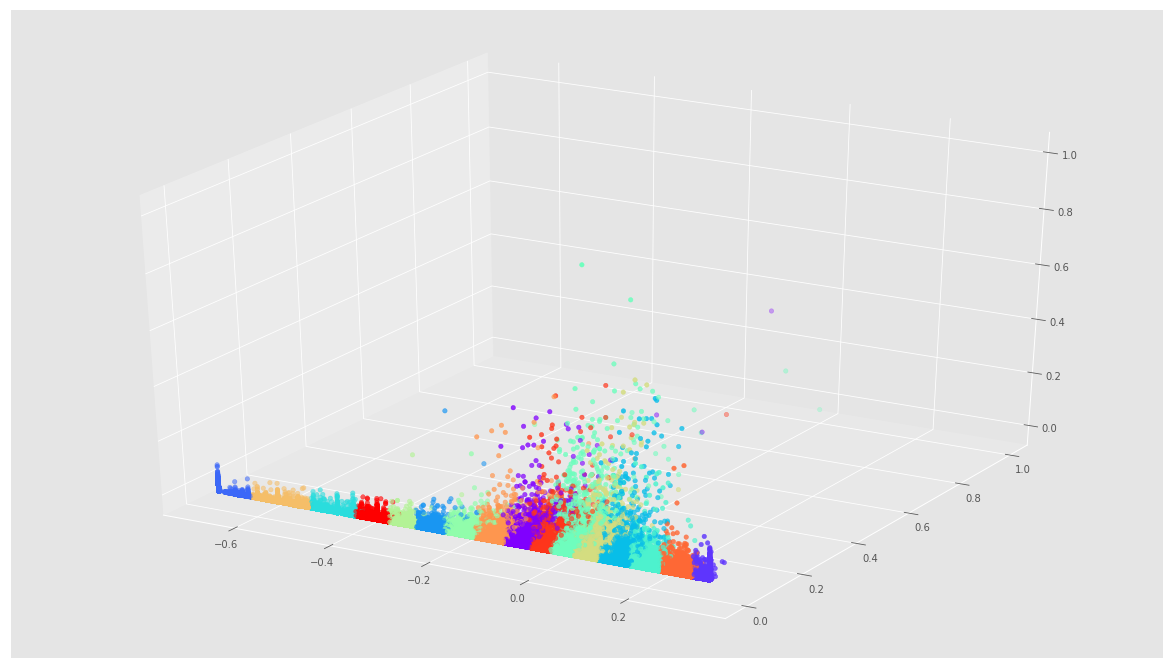

In [41]:
# Number of clusters
kmeans = KMeans(n_clusters=16)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],X[:, 2],c=kmeans.labels_, cmap='rainbow')
fig.savefig("TechReportFigures/UserClusters/Cluster16.png")

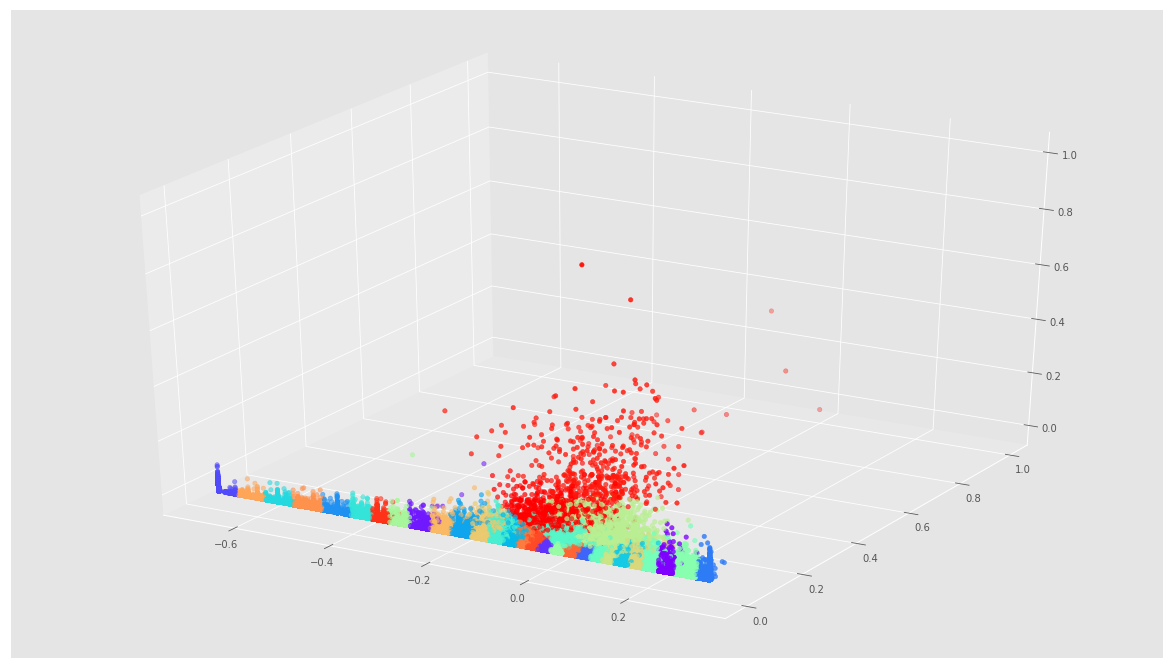

In [42]:
# Number of clusters
kmeans = KMeans(n_clusters=32)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],X[:, 2],c=kmeans.labels_, cmap='rainbow')
fig.savefig("TechReportFigures/UserClusters/Cluster32.png")
